In [109]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

定义需要拟合的函数为
$$
f(x) = \frac{3\cos(x) + 4\sin(x)}{5e^{x} + 1}
$$

In [110]:
# 定义函数
def f(x):
    return (3 * np.cos(x) + 4 * np.sin(x)) / (5 * np.exp(x) + 1)
    # return np.sin(x)

# 生成训练集
x = np.arange(-10, 10, 0.01)
y = f(x)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

x = torch.Tensor(x)
y = torch.Tensor(y)

定义一个两层ReLU网络

In [111]:
class myModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

开始拟合

In [117]:
input_size = 1
hidden_size = 1000
output_size = 1

net = myModel(input_size, hidden_size, output_size)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0003)

num_epochs = 30000
for epoch in range(num_epochs):    
    outputs = net(x)  
    l = loss(outputs, y)  
    optimizer.zero_grad() 
    l.backward()  
    optimizer.step()
      
    # 打印统计信息  
    if (epoch+1) % 100 == 0:  
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {l.item():.4f}')

Epoch [100/30000], Loss: 4.2200
Epoch [200/30000], Loss: 4.0847
Epoch [300/30000], Loss: 3.9103
Epoch [400/30000], Loss: 3.6923
Epoch [500/30000], Loss: 3.4529
Epoch [600/30000], Loss: 3.1880
Epoch [700/30000], Loss: 2.9107
Epoch [800/30000], Loss: 2.6398
Epoch [900/30000], Loss: 2.3817
Epoch [1000/30000], Loss: 2.1417
Epoch [1100/30000], Loss: 1.9219
Epoch [1200/30000], Loss: 1.7267
Epoch [1300/30000], Loss: 1.5562
Epoch [1400/30000], Loss: 1.4100
Epoch [1500/30000], Loss: 1.2865
Epoch [1600/30000], Loss: 1.1833
Epoch [1700/30000], Loss: 1.0971
Epoch [1800/30000], Loss: 1.0253
Epoch [1900/30000], Loss: 0.9652
Epoch [2000/30000], Loss: 0.9144
Epoch [2100/30000], Loss: 0.8709
Epoch [2200/30000], Loss: 0.8329
Epoch [2300/30000], Loss: 0.7990
Epoch [2400/30000], Loss: 0.7680
Epoch [2500/30000], Loss: 0.7393
Epoch [2600/30000], Loss: 0.7121
Epoch [2700/30000], Loss: 0.6860
Epoch [2800/30000], Loss: 0.6607
Epoch [2900/30000], Loss: 0.6360
Epoch [3000/30000], Loss: 0.6117
Epoch [3100/30000],

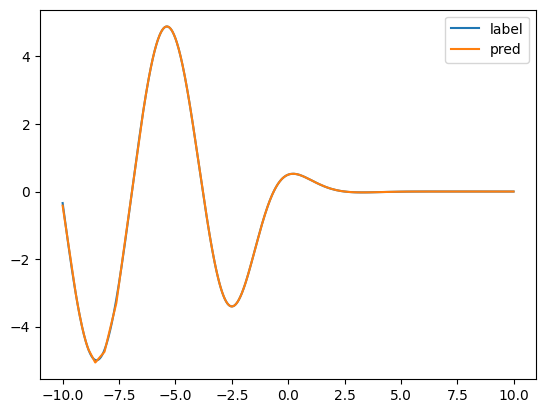

In [118]:
y_hat = net(x)
plt.plot(x.data, y.data, label='label')
plt.plot(x.data, y_hat.data, label='pred')
plt.legend(loc='best')
plt.show()